# 產生投手數據

In [1]:
import cv2
import mediapipe as mp
import pandas as pd

# 初始化 MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False, model_complexity=2, enable_segmentation=False, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# 輸入影片路徑
video_path = "..\徐若熙 155kph 96mph 投球慢動作 20240420.mp4"
cap = cv2.VideoCapture(video_path)

# 儲存結果
results = []

frame_idx = 0
while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break

    # 轉換顏色為 RGB
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results_pose = pose.process(image)

    # 取得姿勢關鍵點
    if results_pose.pose_landmarks:
        landmarks = results_pose.pose_landmarks.landmark
        for i, lm in enumerate(landmarks):
            results.append({
                "frame": frame_idx,
                "joint_id": i,
                "x": lm.x,
                "y": lm.y,
                "z": lm.z,
                "visibility": lm.visibility
            })
    
    frame_idx += 1
    cv2.imshow("Pose Classification", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
pose.close()

# 儲存為 CSV
df = pd.DataFrame(results)
df.to_csv("pose_xyz_over_time.csv", index=False)
print("儲存完成: pose_xyz_over_time.csv")


儲存完成: pose_xyz_over_time.csv


# 檢視資料

In [2]:
import pandas as pd
df = pd.read_csv('pose_xyz_over_time.csv')
df

,frame,joint_id,x,y,z,visibility
0,0,0,0.371567,0.338884,-0.078467,0.999786
1,0,1,0.369910,0.329063,-0.065054,0.999384
2,0,2,0.370291,0.328199,-0.065166,0.999366
3,0,3,0.370776,0.327169,-0.065122,0.999461
4,0,4,0.367677,0.329842,-0.069697,0.999644
...,...,...,...,...,...,...
24778,752,28,0.598630,0.841120,0.131795,0.923195
24779,752,29,0.682240,0.830770,-0.023940,0.946354
24780,752,30,0.605561,0.861050,0.134154,0.928913
24781,752,31,0.671820,0.886752,-0.112349,0.982108


In [13]:
tag = {'11':'LEFT_SHOULDER左肩',
       '12':'RIGHT_SHOULDER右肩',
       '13':'LEFT_ELBOW左手肘',
       '14':'RIGHT_ELBOW右手肘',
       '15':'LEFT_WRIST左手腕',
       '16':'RIGHT_WRIST右手腕'
}

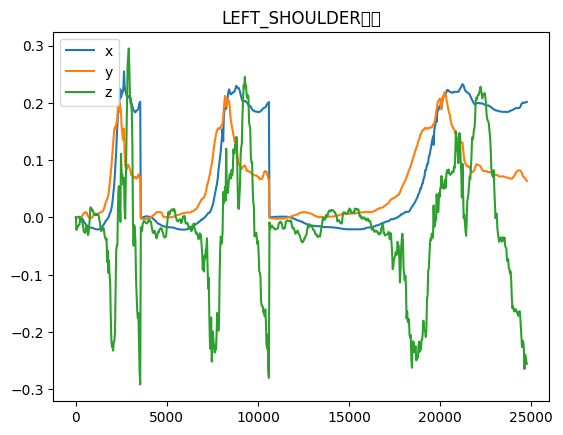

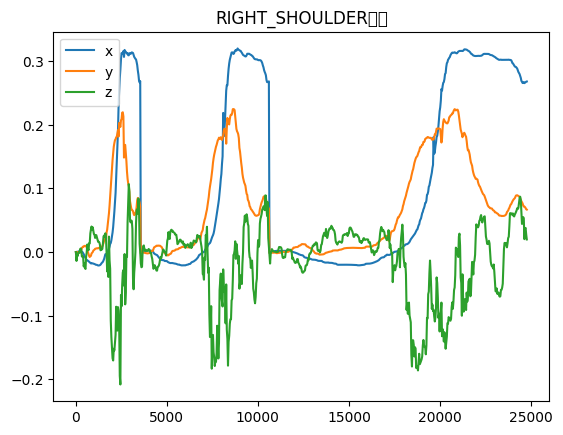

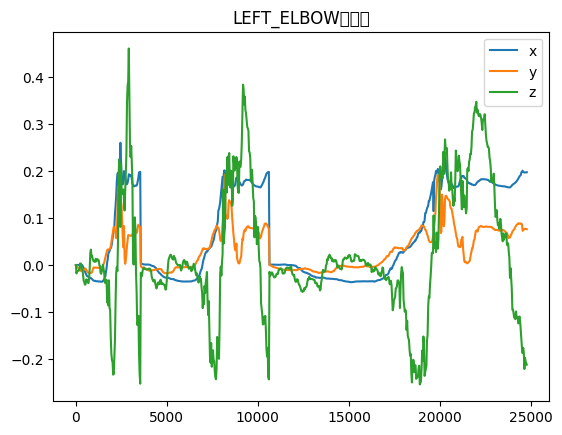

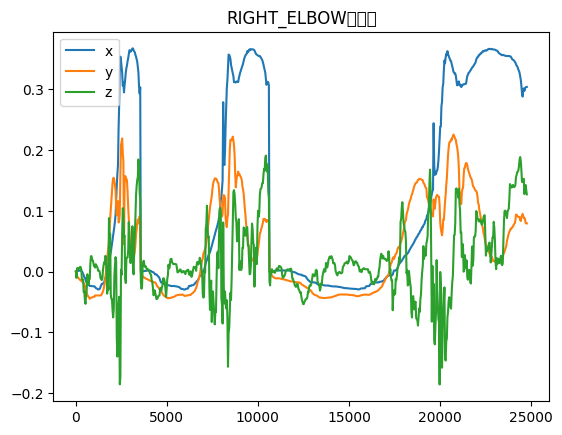

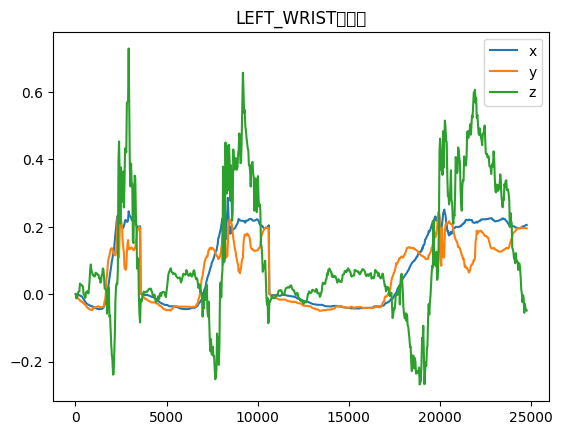

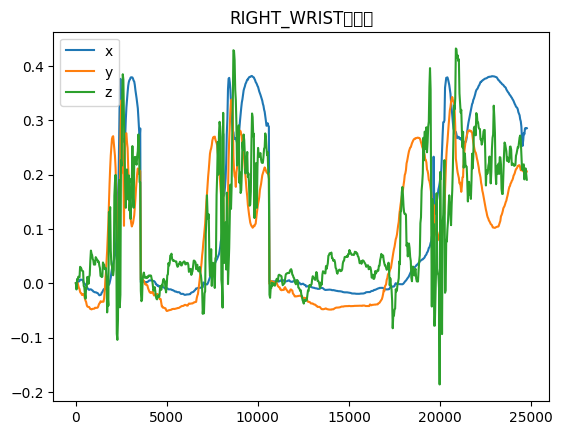

In [15]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")  # This will suppress all warnings
for i in range(11,17):
    (df.loc[df['joint_id'] == i, 'x'] - df.loc[df['joint_id'] == i, 'x'].iloc[0]).plot(label='x')
    (df.loc[df['joint_id'] == i, 'y'] - df.loc[df['joint_id'] == i, 'y'].iloc[0]).plot(label='y')
    (df.loc[df['joint_id'] == i, 'z'] - df.loc[df['joint_id'] == i, 'z'].iloc[0]).plot(label='z')
    plt.legend()
    plt.title(tag[str(i)])
    plt.show()